<a href="https://colab.research.google.com/github/Canchili/-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [22]:
df = pd.read_csv("/content/Customers.csv")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [25]:
# преобразовать категориальные признаки в category
df["Gender"] = df["Gender"].astype("category")
df["Profession"] = df["Profession"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              2000 non-null   int64   
 1   Gender                  2000 non-null   category
 2   Age                     2000 non-null   int64   
 3   Annual Income ($)       2000 non-null   int64   
 4   Spending Score (1-100)  2000 non-null   int64   
 5   Profession              1965 non-null   category
 6   Work Experience         2000 non-null   int64   
 7   Family Size             2000 non-null   int64   
dtypes: category(2), int64(6)
memory usage: 98.3 KB


In [15]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df["Spending Score (1-100)"]
X = df.drop("Spending Score (1-100)", axis=1)
print(y.head())
print(X.head())

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64
   CustomerID  Gender  Age  Annual Income ($)     Profession  Work Experience  \
0           1    Male   19              15000     Healthcare                1   
1           2    Male   21              35000       Engineer                3   
2           3  Female   20              86000       Engineer                1   
3           4  Female   23              59000         Lawyer                0   
4           5  Female   31              38000  Entertainment                2   

   Family Size  
0            4  
1            3  
2            1  
3            2  
4            6  


In [16]:
X.describe(include='all')

,CustomerID,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size
count,2000.000000,2000,2000.000000,2000.000000,2000,2000.000000,2000.000000
unique,NaN,2,NaN,NaN,9,NaN,NaN
top,NaN,Female,NaN,NaN,Artist,NaN,NaN
freq,NaN,1186,NaN,NaN,647,NaN,NaN
mean,1000.500000,NaN,48.960000,110731.821500,NaN,4.102500,3.768500
std,577.494589,NaN,28.429747,45739.536688,NaN,3.922204,1.970749
min,1.000000,NaN,0.000000,0.000000,NaN,0.000000,1.000000
25%,500.750000,NaN,25.000000,74572.000000,NaN,1.000000,2.000000
50%,1000.500000,NaN,48.000000,110045.000000,NaN,3.000000,4.000000
75%,1500.250000,NaN,73.000000,149092.750000,NaN,7.000000,5.000000


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

**Категориальные**

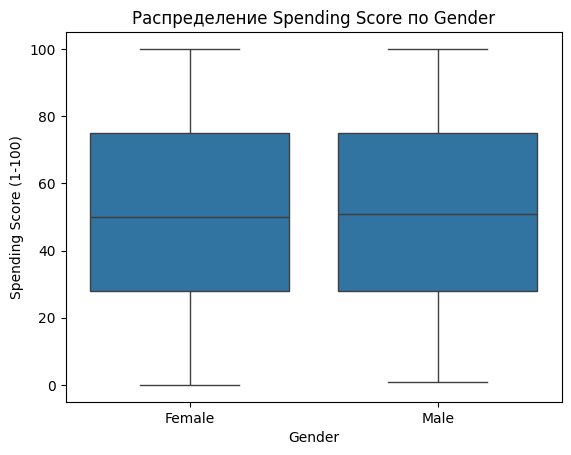

         count       mean        std  min   25%   50%   75%    max
Gender                                                            
Female  1186.0  50.974705  28.032580  0.0  28.0  50.0  75.0  100.0
Male     814.0  50.944717  27.808573  1.0  28.0  51.0  75.0  100.0


/tmp/ipython-input-1868436358.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Gender")["Spending Score (1-100)"].describe())


In [30]:
# boxplot распределения целевой переменной по полу
sns.boxplot(data=df, x="Gender", y="Spending Score (1-100)")
plt.title("Распределение Spending Score по Gender")
plt.show()

print(df.groupby("Gender")["Spending Score (1-100)"].describe())

По количеству участников группы почти равны (Female — 1186, Male — 814), что обеспечивает сбалансированность.

Среднее значение Spending Score по полу практически не отличается: Female ≈ 50.97, Male ≈ 50.94.

Стандартное отклонение также близко (около 28), что говорит о схожем разбросе значений внутри групп.

Медиана и квартильные значения указывают на одинаковое распределение для обеих групп.

Вывод: Пол почти не влияет на уровень Spending Score, распределение и значения схожи.

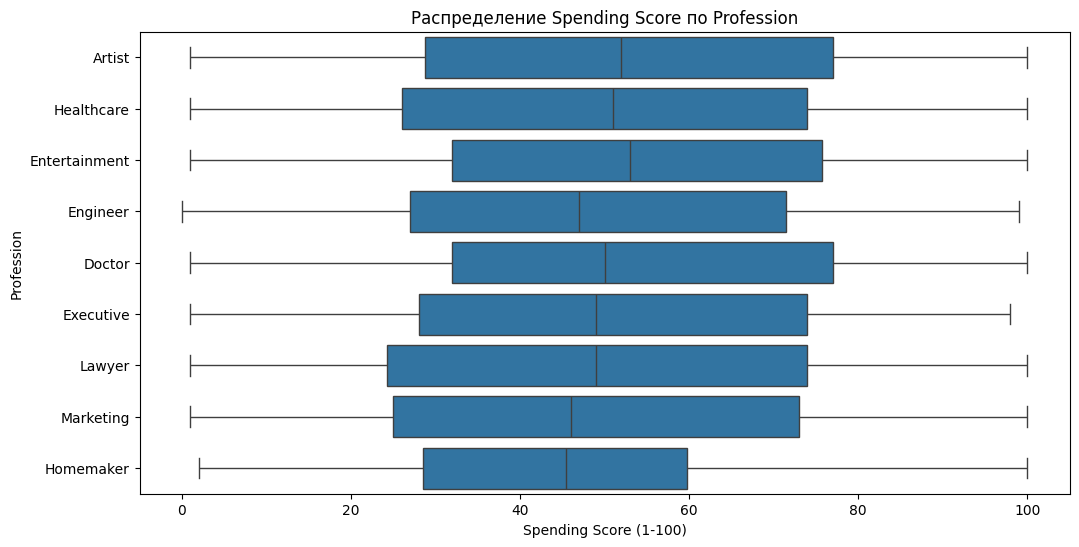

               count       mean        std  min    25%   50%    75%    max
Profession                                                                
Artist         612.0  52.678105  28.404190  1.0  28.75  52.0  77.00  100.0
Doctor         161.0  51.900621  27.437703  1.0  32.00  50.0  77.00  100.0
Engineer       179.0  48.966480  27.733868  0.0  27.00  47.0  71.50   99.0
Entertainment  234.0  52.940171  26.455985  1.0  32.00  53.0  75.75  100.0
Executive      153.0  49.901961  28.102202  1.0  28.00  49.0  74.00   98.0
Healthcare     339.0  50.516224  28.344492  1.0  26.00  51.0  74.00  100.0
Homemaker       60.0  46.383333  28.394373  2.0  28.50  45.5  59.75  100.0
Lawyer         142.0  48.859155  27.718594  1.0  24.25  49.0  74.00  100.0
Marketing       85.0  48.717647  28.924208  1.0  25.00  46.0  73.00  100.0


/tmp/ipython-input-82988222.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Profession")["Spending Score (1-100)"].describe())


In [31]:
# boxplot распределения целевой переменной по профессиям
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y="Profession", x="Spending Score (1-100)", order=df["Profession"].value_counts().index)
plt.title("Распределение Spending Score по Profession")
plt.show()
# Описательная статистика целевой переменной по профессиям
print(df.groupby("Profession")["Spending Score (1-100)"].describe())

Количество наблюдений заметно варьируется, от 60 (Homemaker) до 612 (Artist).

Средний Spending Score варьируется: самыми высокими являются Entertainment (52.94) и Artist (52.68), самыми низкими — Homemaker (46.38), Marketing (48.71) и Lawyer (48.86).

Стандартные отклонения в пределах ~27-29, что говорит о схожем разбросе данных по профессиям.

Медианы и квартильные значения указывают на то, что именно профессия оказывает более заметное влияние на Spending Score, чем пол.

Вывод: Профессия – более значимый фактор, чем пол, для распределения Spending Score. Некоторые профессии, такие как Artist и Entertainment, связаны с более высокими значениями Spending Score.


**Числовые**



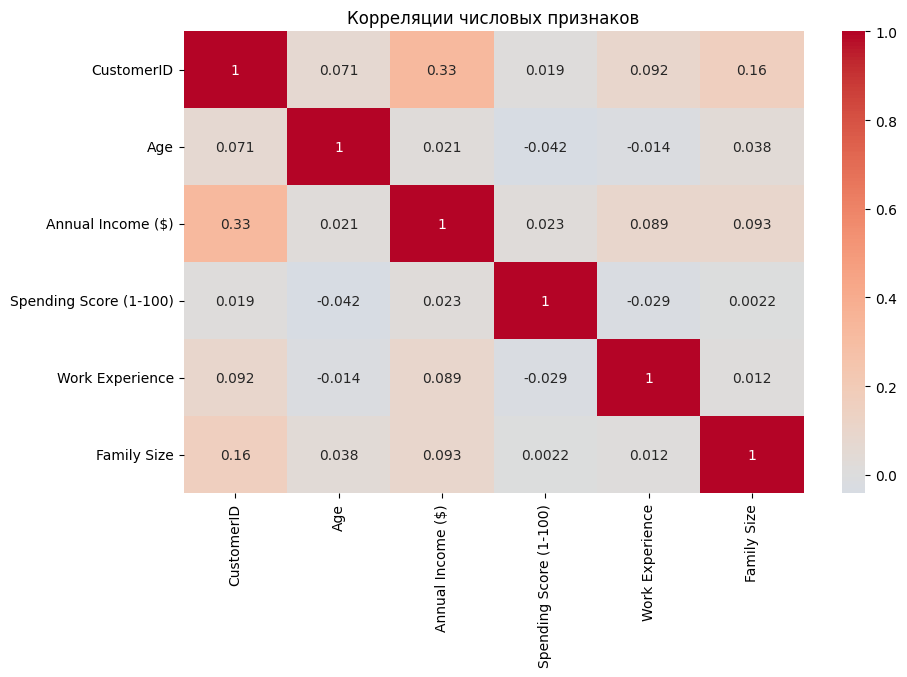

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Корреляции числовых признаков")
plt.show()


Customerid мы не берем

Самая сильная корреляция у Annyal income чуть

С age и Work Experience отрицательная корреляция


/tmp/ipython-input-1771022134.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("coolwarm")


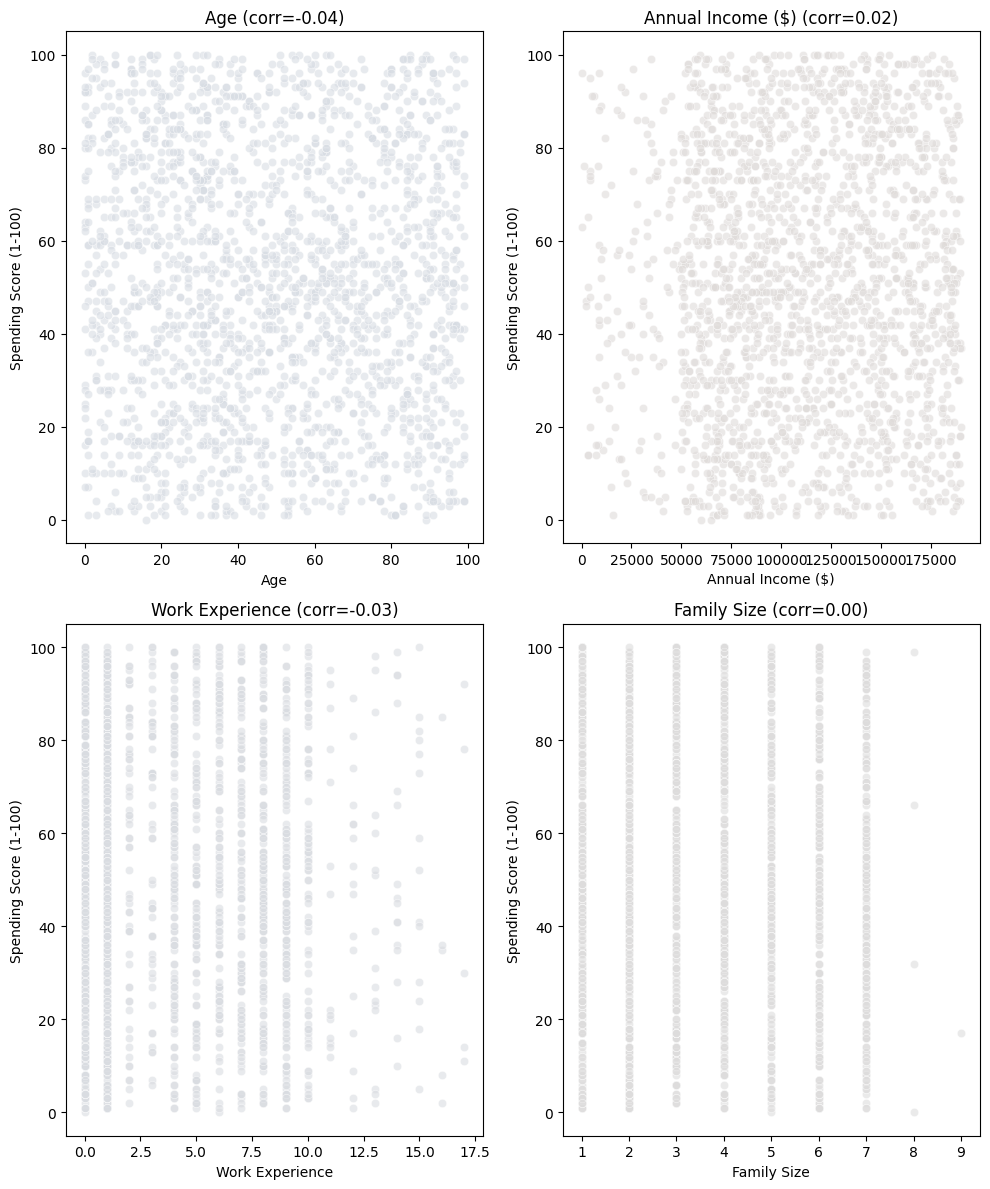

Age                 -0.041798
Annual Income ($)    0.023299
Work Experience     -0.028948
Family Size          0.002232
dtype: float64


In [39]:
# Выделяем числовые признаки
num_features = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size']
n = len(num_features)

# Рассчитываем корреляции с целевой переменной
corrs = df[num_features].corrwith(y)

# Определяем палитру от синего до красного
cmap = plt.cm.get_cmap("coolwarm")

# Создаем сетку графиков 2 в строку
fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(10, n*3))
axes = axes.flatten()

for i, col in enumerate(num_features):
    corr = corrs[col]
    color = cmap((corr + 1) / 2)   # переводим из [-1,1] к [0,1] для палитры

    sns.scatterplot(ax=axes[i], data=df, x=col, y="Spending Score (1-100)", color=color, alpha=0.6)
    axes[i].set_title(f"{col} (corr={corr:.2f})")

# Удаляем пустые графики, если они есть
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


print(corrs)


Все коэффициенты корреляции близки к нулю или отрицательные это указывают на слабую или отсутствующую линейную зависимость.

Но самая близкая это Annyal income так же видно, что чем больше доход, тем больше тратят

In [41]:
print("Пропуски в данных:")
print(df.isnull().sum())

Пропуски в данных:
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


In [42]:
# Для категориального признака 'Profession' заполняем пропуски наиболее частым значением (модой),
#Она сводит к минимуму искажение распределения данных и не учитывает влияние числовых результатов.
#Удавать строки с пропусками нецелесообразно, т.к. теряем данные.
#Заполнение уровня или медианой для категорий не подходит, так как это численные методы.

imputer_cat = SimpleImputer(strategy='most_frequent')

imputed = imputer_cat.fit_transform(df[['Profession']])

df['Profession'] = pd.Series(imputed.flatten(), index=df.index)

In [ ]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


In [43]:
# Список категориальных и числовых признаков
categorical_features = ['Gender', 'Profession']
numerical_features = ['Annual Income ($)']

# Формируем итоговый список признаков
best_features = categorical_features + numerical_features

# Отбор столбцов из датафрейма
X = df[best_features]
y = df['Spending Score (1-100)']  # Целевая переменная

print("Выбранные признаки для модели:")
print(X.head())

print("\nСтатистика целевой переменной:")
print(y.describe())

Выбранные признаки для модели:
   Gender     Profession  Annual Income ($)
0    Male     Healthcare              15000
1    Male       Engineer              35000
2  Female       Engineer              86000
3  Female         Lawyer              59000
4  Female  Entertainment              38000

Статистика целевой переменной:
count    2000.000000
mean       50.962500
std        27.934661
min         0.000000
25%        28.000000
50%        50.000000
75%        75.000000
max       100.000000
Name: Spending Score (1-100), dtype: float64


## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

Модель1

MAE: 23.632
MAPE: inf%
R²: 0.007
MSE: 774.690
RMSE: 27.833


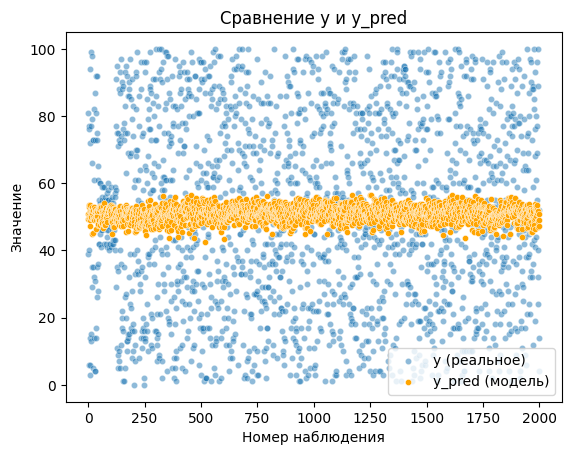

In [ ]:
numeric_features = [f for f in best_features if f not in categorial_features]

# OneHot кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_cat_encoded = encoder.fit_transform(df[categorial_features])
cat_feature_names = encoder.get_feature_names_out(categorial_features)

# Стандартизация числовых признаков
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[numeric_features])

# Объединяем обработанные признаки в DataFrame с именами столбцов
X_scaled = pd.DataFrame(np.hstack([X_num_scaled, X_cat_encoded]),
                        columns=list(numeric_features) + list(cat_feature_names),
                        index=df.index)

# Целевая переменная
y = df[target]

# Создание и обучение модели на всей выборке
model1 = LinearRegression()
model1.fit(X_scaled, y)

# Предсказания на той же выборке
y_pred = model1.predict(X_scaled)

# Вычисление метрик
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f'MAE: {mae:.3f}')
print(f'MAPE: {mape:.2f}%')
print(f'R²: {r2:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')

sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="y_pred (модель)", color="orange", s=20)

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

Считает среднюю абсолютную ошибку.

Чем ближе к 0 → тем лучше.

MAE = 23,632: в средней модели ошибка происходит примерно на 23,6 значения. Это довольно большая средняя ошибка, говорящая о том, что модель не точна.

Показывает среднюю ошибку в % от истинного значения.

Чем ближе к 0% → тем лучше.

MAPE = inf%: бесконечное значение появляется, если в переменной есть нули (деление на ноль) или очень маленькие значения. Эту проблему стоит проверить и при необходимости применить трансформацию данных.

Показывает, насколько хорошо модель объясняет разброс данных.

Чем ближе к 1 → тем лучше.

R² = 0,007: почти ноль, что означает, что модель сердца примерно 0,7% вариаций переменной переменной — очень низкий показатель, модель практически не лучше случайного угадывания.

Показывает «среднюю величину ошибки в квадрате».

Чем ближе к 0 → тем лучше.

MSE = 774,690 высокие значения ошибок, указывающие, что предсказания далеко от начальных значений.

 Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют.

 Чем ближе к 0 → тем лучше.

 RMSE = 27,833: высокие значения ошибок, указывающие, что предсказания далеко от начальных значений.

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [ ]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["YOU_VARIABLE_NAME"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [ ]:
X_encoded = ...

In [ ]:
X = X.drop('YOU_VARIABLE_NAME', axis=1) if 'type' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'type_white' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

### Преобразование числовых

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию


### Модель

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# model.fit(X, y) - обучение
# model.predict(X) - предсказание y
# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)

# для того, чтобы не запутаться используйте следующий нейминг
model1 = LinearRegression() # модель задачи 1
model2 = LinearRegression() # модель задачи 2
... # и так далее

### Разделение на обучающую, тестовую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест